# Compare models by chan vs time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times']
rcParams['font.size'] = 22

In [2]:
root = '/Users/joe/src/gitjoe/sspike/blizzards/'
sn = '0.6kpc-NoTransformation/'
models = ['F21-13/', 'W20-13.0-1.25/', 'N13-13-20-300/']
files = []
for model in models:
    files.append(f'{root}{model}{sn}sno_pd.csv')
files

['/Users/joe/src/gitjoe/sspike/blizzards/F21-13/0.6kpc-NoTransformation/sno_pd.csv',
 '/Users/joe/src/gitjoe/sspike/blizzards/W20-13.0-1.25/0.6kpc-NoTransformation/sno_pd.csv',
 '/Users/joe/src/gitjoe/sspike/blizzards/N13-13-20-300/0.6kpc-NoTransformation/sno_pd.csv']

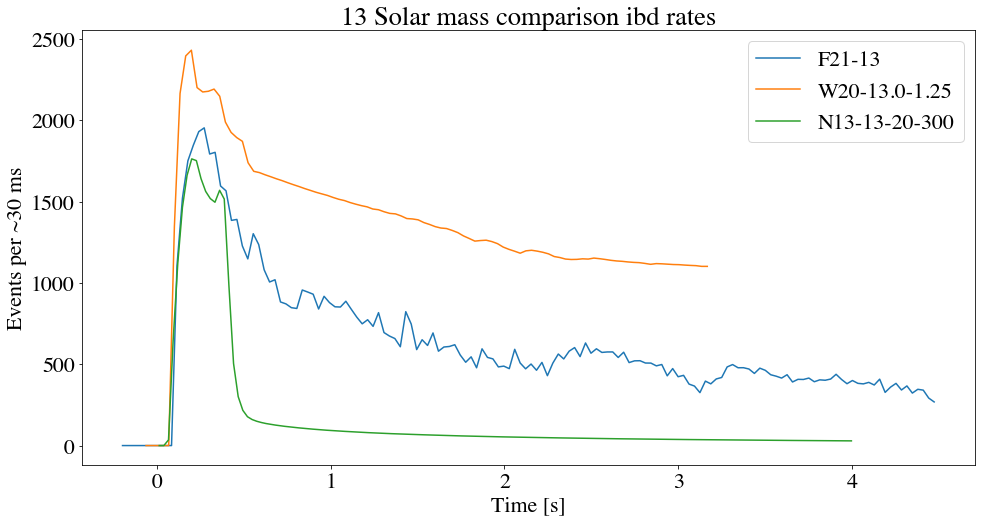

0.031346666666666606


In [31]:
fig, ax = plt.subplots(1, figsize=(16, 8))

for i, file in enumerate(files):
    df = pd.read_csv(file, sep=' ')
    dt = df['time'][1] - df['time'][0]
    if i == 0:
        dt0 = dt
        scale = 1
    if i == 1:
        df['time'] += 1.5
        scale = dt0 / dt
    if i == 2:
        df['time'] += 0.05
        cut = 150
        scale = dt0 / dt
        plt.plot(df['time'][:cut], df['ibd'][:cut] * scale, label=models[i][:-1])
        continue
    ax.plot(df['time'], df['ibd'] * scale, label=models[i][:-1])
ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Events per ~30 ms')
plt.title('13 Solar mass comparison ibd rates')
plt.show()
print(dt0)

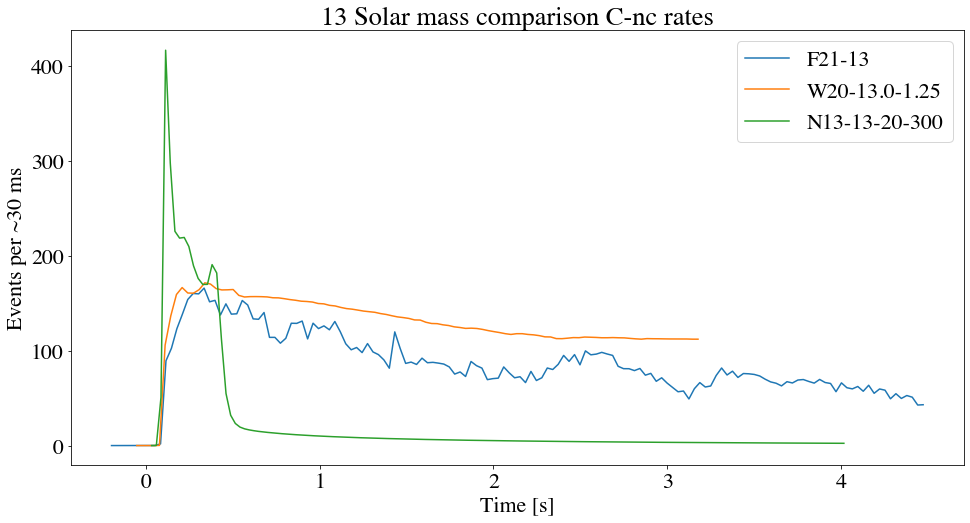

0.031346666666666606


In [36]:
fig, ax = plt.subplots(1, figsize=(16, 8))

for i, file in enumerate(files):
    df = pd.read_csv(file, sep=' ')
    dt = df['time'][1] - df['time'][0]
    if i == 0:
        dt0 = dt
        scale = 1
    if i == 1:
        df['time'] += 1.51
        scale = dt0 / dt
    if i == 2:
        cut = 150
        df['time'] += 0.07
        scale = dt0 / dt
        plt.plot(df['time'][:cut], df['nc'][:cut] * scale, label=models[i][:-1])
        continue
    ax.plot(df['time'], df['nc'] * scale, label=models[i][:-1])
ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Events per ~30 ms')
plt.title('13 Solar mass comparison C-nc rates')
plt.show()
print(dt0)

# Next

- Add oscillations
- Compare for a few SN candidates